# Week 3 ‒ 클로젯셰어 데이터를 이용해서 신규가입자 특성 파악하기

## 필수분석
<b>1. 구매 소요 시간 분석<br></b>

1-1. 가입일로부터 구매일까지 전환된 소요시간 분석
- 최근 3개월 전체 분석 / 각 월 별 분석
- 분기 경향 / 월 별 변동사항 확인 -> 트렌드 분석
ex. 가입 1일 이내 전환 유저 : 10% -> 15% 상승 성과


<b>2. 구매 상품 트렌드 분석<br></b>

2-1. 유저당 주문 수량 분석
- 최근 3개월 전체 분석 / 각 월 별 분석
- 분기 경향 / 월 별 변동사항 확인 -> 트렌드 분석

2-2. 주문 아이템 분석<br>
- 브랜드 별 선호도, 아이템 카테고리별 선호도 분석
- 신규 유저들의 구매 트렌드 파악


<b>3. 분석 내용 토대로 인사이트 도출<br></b>

3-1. 분석 내용 도식화
- 1~2의 분석 내용 종합 및 도식화 (표 또는 그래프)
- 유사성을 갖는 결과에 대하여 그룹화

3-2. 인사이트 도출
- 해당 결과를 통해 나타나는 사항 정리
- 인사이트 도출 혹은 새로운 제안사항 전달 (없을 시 진행하지 않아도 무방)

## 추가분석
<b>1. 분석 결과물 – AARRR에 기반한 분석</b>
- 클로젯셰어 서비스에 대한 AARRR에 기반한 분석(셰어러 입장에서)
- 클로젯셰어 서비스에 대한 AARRR에 기반한 분석(구매자 입장에서)<br>

<b>2. 분석 결과물 2 - 유저별 그룹핑(코호트)에 기반한 분석</b><br>

<b>3. 분석 결과물 3 – 특정 브랜드/특정 아이템에 대해 수요가 집중되는 경향성이 있는지 분석</b>

## 컬럼 설명
- brandnm : 아이템 브랜드명
- goodsnm : 아이템 명
- user : 개별 유저 식별 값
- reg_date : 개별 유저 가입일
- order_date : 아이템 주문일
- p_type : 주문 상품 종류 (7days (7일권) / 4days (4일권))
- sub_type : 주문 상품 카테고리 (BA – 가방 / O – 아우터 / D – 드레스 / T – 상의 / B – 하의 / TP– 투피스)
- app_yn : 어플리케이션 사용 여부 (Y – 어플리케이션 사용 / (공백) – 어플리케이션 미사용)

# 데이터 탐색

## 데이터 불러오기

In [242]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [243]:
%matplotlib inline
plt.rcParams['font.family'] = 'Malgun Gothic'
#plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

pd.options.display.float_format = '{:20,.1f}'.format
pd.options.display.max_colwidth = 99
pd.options.display.max_columns = 99
np.random.seed(42)

In [244]:
df = pd.read_excel('클로젯셰어_과제DB 대체 자료.xlsx').rename(columns=str.lower)
df

,brandnm,goodsnm,user,reg_date,order_date,p_type,sub_type,app_yn
0,Gucci,flower dionysus shoulder bag beige,a161237,2019-12-06,2021-01-15,7days,BA,Y
1,El estilo de Claire,beads cropped jacket black,a1140859,2021-01-02,2021-01-15,4days,O,NaN
2,Danha,embroidery point oriental mini skirt blue,a1140859,2021-01-02,2021-01-15,4days,B,NaN
3,Danha,graphics pattern top pink,a1140859,2021-01-02,2021-01-15,4days,T,NaN
4,Burberry London,buckle basic pattern zipup-jumper navy,a1140740,2021-01-01,2021-01-15,7days,O,Y
...,...,...,...,...,...,...,...,...
1466,Yves Saint Laurent,logo point clutch bag pink,a119721,2019-04-10,2021-03-01,7days,BA,Y
1467,Prada,saffiano lux M gray,a1146069,2021-02-11,2021-03-01,7days,BA,Y
1468,Burberry,basic pattern sweater beige,a1147848,2021-02-28,2021-03-01,7days,T,Y
1469,Chanel,graphics pattern sweat-shirts white,a1147788,2021-02-28,2021-03-01,7days,T,Y


## 기본정보 확인

In [245]:
df.describe()

,brandnm,goodsnm,user,reg_date,order_date,p_type,sub_type,app_yn
count,1442,1471,1471,1466,1471,1471,1471,1295
unique,245,979,1234,368,90,2,6,1
top,Gucci,chevron quilted cross bag black,a1149461,2021-03-16 00:00:00,2021-03-24 00:00:00,4days,BA,Y
freq,232,23,11,44,47,894,692,1295
first,NaN,NaN,NaN,2017-06-24 00:00:00,2021-01-01 00:00:00,NaN,NaN,NaN
last,NaN,NaN,NaN,2021-03-31 00:00:00,2021-03-31 00:00:00,NaN,NaN,NaN


In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1471 entries, 0 to 1470
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   brandnm     1442 non-null   object        
 1   goodsnm     1471 non-null   object        
 2   user        1471 non-null   object        
 3   reg_date    1466 non-null   datetime64[ns]
 4   order_date  1471 non-null   datetime64[ns]
 5   p_type      1471 non-null   object        
 6   sub_type    1471 non-null   object        
 7   app_yn      1295 non-null   object        
dtypes: datetime64[ns](2), object(6)
memory usage: 92.1+ KB


In [247]:
for col in df.columns:
    print(f"Column명: {col}")
    print(f"Unique값: {df[col].nunique()}")
    print()

Column명: brandnm
Unique값: 245

Column명: goodsnm
Unique값: 979

Column명: user
Unique값: 1234

Column명: reg_date
Unique값: 368

Column명: order_date
Unique값: 90

Column명: p_type
Unique값: 2

Column명: sub_type
Unique값: 6

Column명: app_yn
Unique값: 1



In [248]:
for col in df[['brandnm', 'sub_type']]:
    print(f"Column명: {col}")
    print(f"Unique값: {df[col].unique()}")
    print()

Column명: brandnm
Unique값: ['Gucci' 'El estilo de Claire' 'Danha' 'Burberry London' 'Prada'
 'Max Mara' 'Molliolli' 'Sandro' 'Louis Vuitton' 'Tory Burch' 'Chloe'
 'Time' 'The Izzat' 'Mojosphine' 'Ted Baker' '& Other Stories' 'Fendi'
 'Balmain' 'Celine' 'Burberry' 'Chanel' 'Dior' 'Bottega Veneta'
 'Plastic Island' 'Reneevon' 'Sorry Too Much Love' 'Saint Laurent'
 'Miu Miu' 'Yves Saint Laurent' 'Zooc' 'Vivienne Westwood'
 'Maison Kitsune' 'Margarin fingers' 'The Tint' 'Love Moschino' 'Michaa'
 'Vivienne Westwood Red Label' 'MSGM' 'Christian Dior' 'It michaa' 'SJSJ'
 'Amsale' 'Imvely' 'Chi Chi London' 'Maje' 'Biker Starlet' 'Thom Browne'
 'Jill By Jill Stuart' 'Comme des Garcons' 'Nain' 'Dolce & Gabbana'
 'Givenchy' 'Salvatore Ferragamo' 'Andersen-Andersen' 'A.P.C.'
 'Self-portrait' 'Sonia Rykiel' 'Diane von Furstenberg' 'Hugo Boss'
 'Baum Und Pferdgarten' 'BCBG' 'Lmml Studio' 'Nike' 'Not Your Rose' nan
 'Jigott' 'Escada' 'Diagonal' 'System' 'On&On' 'Lucky Chouette'
 'The Clozet' 'Allen.O'

In [249]:
df.isnull().sum()

brandnm        29
goodsnm         0
user            0
reg_date        5
order_date      0
p_type          0
sub_type        0
app_yn        176
dtype: int64

## brandnm이 결측치인 경우

In [250]:
# brandnm 컬럼의 null값인 경우는 sub_type이 투피스(TP)인 경우에 해당하며, goodsnm 컬럼에 2개 제품명이 &으로 연결되어 있음
# 홈페이지 검색시 2개의 brandnm이 조회됨 -> 크롤링 방법을 찾거나 수기로 정보를 가져올 수 있을 것으로 보임
df[df['brandnm'].isnull()].head(10)

,brandnm,goodsnm,user,reg_date,order_date,p_type,sub_type,app_yn
146,NaN,feminine military blouse & high waist wide slacks,a1144948,2021-01-30,2021-01-30,4days,TP,Y
147,NaN,button basic pattern doublebreasted-jacket skyblue & slit basic pattern skirt skyblue,a170041,2020-01-01,2021-01-30,4days,TP,Y
160,NaN,lace point shirring blouse pink & lace detail long mermaid skirt,a1141009,2021-01-04,2021-01-28,4days,TP,Y
220,NaN,printing pattern hoodie grey & pocket basic pattern jogger-pants grey,a1144470,2021-01-25,2021-01-26,4days,TP,Y
267,NaN,button basic pattern jacket black & pocket basic pattern slacks black,a121913,2019-05-05,2021-01-21,4days,TP,Y
282,NaN,buckle shirt & embroidery lace skirt charcoal,a1132297,2020-11-22,2021-01-21,7days,TP,Y
285,NaN,button tweed pattern doublebreasted-coat multi & tweed pattern skirt multi,a1127979,2020-10-31,2021-01-21,7days,TP,Y
329,NaN,long sleeve rib t-shirt & check pattern square neck dress,a1134915,2020-12-03,2021-01-19,7days,TP,NaN
342,NaN,cutout neck knit & color pleats belt skirt,a1141257,2021-01-05,2021-01-19,4days,TP,Y
368,NaN,El estilo de Claire - neoprene botanical print top_pleats fake leather skirt ash,a1107090,2020-07-03,2021-01-17,4days,TP,Y


## reg_date이 결측치인 경우

In [251]:
# reg_date 컬럼의 null값 확인
df[df['reg_date'].isnull()]

,brandnm,goodsnm,user,reg_date,order_date,p_type,sub_type,app_yn
265,Gucci,mamont chain bag red,a1144008,NaT,2021-01-21,7days,BA,Y
351,Lanvin,banding point jumper skyblue,a1142855,NaT,2021-01-18,7days,O,NaN
564,Gucci,leather point cross bag,a1146490,NaT,2021-02-18,4days,BA,Y
746,Fendi,monogram zucchino shoulder bag,a1145478,NaT,2021-02-04,4days,BA,NaN
1254,Fendi,back to school bag 1,a1149094,NaT,2021-03-12,7days,BA,Y


In [252]:
# 주어진 데이터 인덱스 기준으로는 결측치 앞뒤 데이터에 일정한 규칙 보이지 않음
reg_date_null = df[df['reg_date'].isnull()].index.tolist()
for i in reg_date_null:
    pre_con = df.loc[i-3:i+3,['user', 'reg_date','order_date']]
    print(pre_con)

         user   reg_date order_date
262  a1144011 2021-01-21 2021-01-22
263  a1144042 2021-01-22 2021-01-22
264  a1141954 2021-01-10 2021-01-22
265  a1144008        NaT 2021-01-21
266   a186345 2020-03-04 2021-01-21
267   a121913 2019-05-05 2021-01-21
268   a178166 2020-01-29 2021-01-21
         user   reg_date order_date
348  a1139870 2020-12-25 2021-01-18
349   a152462 2019-10-30 2021-01-18
350  a1141029 2021-01-04 2021-01-18
351  a1142855        NaT 2021-01-18
352  a1143692 2021-01-18 2021-01-18
353  a1143683 2021-01-18 2021-01-18
354   a197498 2020-04-20 2021-01-18
         user   reg_date order_date
561  a1146417 2021-02-15 2021-02-18
562  a1126491 2020-10-24 2021-02-18
563  a1145696 2021-02-06 2021-02-18
564  a1146490        NaT 2021-02-18
565  a1146744 2021-02-17 2021-02-18
566  a1145314 2021-02-03 2021-02-18
567  a1145314 2021-02-03 2021-02-18
         user   reg_date order_date
743  a1145187 2021-02-02 2021-02-04
744  a1145073 2021-02-01 2021-02-04
745  a1145436 2021-02-04 202

In [253]:
# 유저 일련번호가 reg_date 순으로 부여되었는지 확인
user_check = df.sort_values(by = 'reg_date').reset_index()[['reg_date','user']]
user_check['user_num'] = user_check['user'].str[1:].astype(int)
user_check

,reg_date,user,user_num
0,2017-06-24,a11612,11612
1,2017-07-02,a11803,11803
2,2018-03-09,a13637,13637
3,2018-03-20,a13741,13741
4,2018-03-27,a13934,13934
...,...,...,...
1466,NaT,a1144008,1144008
1467,NaT,a1142855,1142855
1468,NaT,a1146490,1146490
1469,NaT,a1145478,1145478


In [254]:
# reg_date 순으로 부여된 것이 아님
user_check_list = []
for i in range(0, user_check.shape[0]):
    try:
        if user_check['user_num'][i] > user_check['user_num'][i+1]:
            user_check_list.append('a')
        else:
            user_check_list.append('b')
    except:
        pass
    
print(f'Count of "a" : {user_check_list.count("a")}')
print(f'Count of "b" : {user_check_list.count("b")}')

Count of "a" : 486
Count of "b" : 984


In [255]:
# 유저 일련번호가 order_date 순으로 부여되었는지 확인
user_check = df.sort_values(by = 'order_date').reset_index()[['order_date','user']]
user_check['user_num'] = user_check['user'].str[1:].astype(int)
user_check

,order_date,user,user_num
0,2021-01-01,a1112031,1112031
1,2021-01-01,a196681,196681
2,2021-01-01,a196681,196681
3,2021-01-01,a196681,196681
4,2021-01-02,a1140621,1140621
...,...,...,...
1466,2021-03-31,a1151465,1151465
1467,2021-03-31,a1144560,1144560
1468,2021-03-31,a1151499,1151499
1469,2021-03-31,a1151466,1151466


In [256]:
# order_date 순으로 부여된 것이 아님
user_check_list = []
for i in range(0, user_check.shape[0]):
    try:
        if user_check['user_num'][i] > user_check['user_num'][i+1]:
            user_check_list.append('a')
        else:
            user_check_list.append('b')
    except:
        pass
    
print(f'Count of "a" : {user_check_list.count("a")}')
print(f'Count of "b" : {user_check_list.count("b")}')

Count of "a" : 665
Count of "b" : 805


In [257]:
# reg_date가 null인 유저ID 
# 모두 서비스를 이용한 횟수가 1건인 유저로 reg_date를 유추할 단서가 없음
reg_date_null_users = df.loc[df['reg_date'].isnull(), 'user'].tolist()
df[df['user'].isin(reg_date_null_users)]

,brandnm,goodsnm,user,reg_date,order_date,p_type,sub_type,app_yn
265,Gucci,mamont chain bag red,a1144008,NaT,2021-01-21,7days,BA,Y
351,Lanvin,banding point jumper skyblue,a1142855,NaT,2021-01-18,7days,O,NaN
564,Gucci,leather point cross bag,a1146490,NaT,2021-02-18,4days,BA,Y
746,Fendi,monogram zucchino shoulder bag,a1145478,NaT,2021-02-04,4days,BA,NaN
1254,Fendi,back to school bag 1,a1149094,NaT,2021-03-12,7days,BA,Y


# 데이터 전처리

In [258]:
# reg_date가 null인 데이터 삭제
df = df[df['reg_date'].notnull()]
df

,brandnm,goodsnm,user,reg_date,order_date,p_type,sub_type,app_yn
0,Gucci,flower dionysus shoulder bag beige,a161237,2019-12-06,2021-01-15,7days,BA,Y
1,El estilo de Claire,beads cropped jacket black,a1140859,2021-01-02,2021-01-15,4days,O,NaN
2,Danha,embroidery point oriental mini skirt blue,a1140859,2021-01-02,2021-01-15,4days,B,NaN
3,Danha,graphics pattern top pink,a1140859,2021-01-02,2021-01-15,4days,T,NaN
4,Burberry London,buckle basic pattern zipup-jumper navy,a1140740,2021-01-01,2021-01-15,7days,O,Y
...,...,...,...,...,...,...,...,...
1466,Yves Saint Laurent,logo point clutch bag pink,a119721,2019-04-10,2021-03-01,7days,BA,Y
1467,Prada,saffiano lux M gray,a1146069,2021-02-11,2021-03-01,7days,BA,Y
1468,Burberry,basic pattern sweater beige,a1147848,2021-02-28,2021-03-01,7days,T,Y
1469,Chanel,graphics pattern sweat-shirts white,a1147788,2021-02-28,2021-03-01,7days,T,Y


In [259]:
# app_yn 컬럼의 null값 'N'으로 대체
df.loc[df['app_yn'].isnull(), 'app_yn'] = 'N'
df

,brandnm,goodsnm,user,reg_date,order_date,p_type,sub_type,app_yn
0,Gucci,flower dionysus shoulder bag beige,a161237,2019-12-06,2021-01-15,7days,BA,Y
1,El estilo de Claire,beads cropped jacket black,a1140859,2021-01-02,2021-01-15,4days,O,N
2,Danha,embroidery point oriental mini skirt blue,a1140859,2021-01-02,2021-01-15,4days,B,N
3,Danha,graphics pattern top pink,a1140859,2021-01-02,2021-01-15,4days,T,N
4,Burberry London,buckle basic pattern zipup-jumper navy,a1140740,2021-01-01,2021-01-15,7days,O,Y
...,...,...,...,...,...,...,...,...
1466,Yves Saint Laurent,logo point clutch bag pink,a119721,2019-04-10,2021-03-01,7days,BA,Y
1467,Prada,saffiano lux M gray,a1146069,2021-02-11,2021-03-01,7days,BA,Y
1468,Burberry,basic pattern sweater beige,a1147848,2021-02-28,2021-03-01,7days,T,Y
1469,Chanel,graphics pattern sweat-shirts white,a1147788,2021-02-28,2021-03-01,7days,T,Y


# EDA

## 가입일로부터 구매일까지 전환된 소요시간 분석

- 최근 3개월 전체 분석 / 각 월별 분석
- 월별 변동사항 확인 -> 트렌드 분석 (ex. 가입 1일 이내 전환 유저 : 10% -> 15% 상승 성과)

In [260]:
df['lag'] = (df['order_date'] - df['reg_date']).dt.days
df['lag_month'] = df['lag']/30
df['order_month'] = df['order_date'].dt.month
df

,brandnm,goodsnm,user,reg_date,order_date,p_type,sub_type,app_yn,lag,lag_month,order_month
0,Gucci,flower dionysus shoulder bag beige,a161237,2019-12-06,2021-01-15,7days,BA,Y,406,13.5,1
1,El estilo de Claire,beads cropped jacket black,a1140859,2021-01-02,2021-01-15,4days,O,N,13,0.4,1
2,Danha,embroidery point oriental mini skirt blue,a1140859,2021-01-02,2021-01-15,4days,B,N,13,0.4,1
3,Danha,graphics pattern top pink,a1140859,2021-01-02,2021-01-15,4days,T,N,13,0.4,1
4,Burberry London,buckle basic pattern zipup-jumper navy,a1140740,2021-01-01,2021-01-15,7days,O,Y,14,0.5,1
...,...,...,...,...,...,...,...,...,...,...,...
1466,Yves Saint Laurent,logo point clutch bag pink,a119721,2019-04-10,2021-03-01,7days,BA,Y,691,23.0,3
1467,Prada,saffiano lux M gray,a1146069,2021-02-11,2021-03-01,7days,BA,Y,18,0.6,3
1468,Burberry,basic pattern sweater beige,a1147848,2021-02-28,2021-03-01,7days,T,Y,1,0.0,3
1469,Chanel,graphics pattern sweat-shirts white,a1147788,2021-02-28,2021-03-01,7days,T,Y,1,0.0,3


### 3개월 전체 데이터

In [261]:
# 구매전환 최소 소요일 : 0
# 구매전환 최대 소요일 : 1304
df_lag = df.groupby('user')['lag'].min().reset_index().sort_values(by = 'lag', ascending = False)
df_lag

,user,lag
1052,a11612,1304
1058,a11803,1298
1080,a13741,1107
1078,a13637,1090
1093,a14279,1073
...,...,...
864,a1149584,0
862,a1149582,0
861,a1149580,0
857,a1149547,0


<AxesSubplot:>

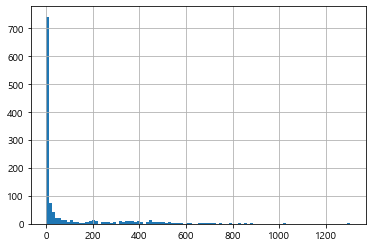

In [262]:
df_lag['lag'].hist(bins = 100)

In [263]:
# 가입일로부터 첫결제일까지 걸린 시간 lag_lvl에 6개 분류로 표기
cut_labels = ['Sameday', '1day', '1week', '1month', '1year', 'Over 1year']
cut_bins = [-1, 0, 1, 7, 30, 365, 1304]
df_lag['lag_lvl'] = pd.cut(df_lag['lag'], bins=cut_bins, labels=cut_labels)
df_lag

,user,lag,lag_lvl
1052,a11612,1304,Over 1year
1058,a11803,1298,Over 1year
1080,a13741,1107,Over 1year
1078,a13637,1090,Over 1year
1093,a14279,1073,Over 1year
...,...,...,...
864,a1149584,0,Sameday
862,a1149582,0,Sameday
861,a1149580,0,Sameday
857,a1149547,0,Sameday


In [264]:
df_lag_lvl = df_lag.groupby('lag_lvl')['user'].count().reset_index().rename(columns = {'user' : 'count'})
df_lag_lvl.head()

,lag_lvl,count
0,Sameday,320
1,1day,124
2,1week,243
3,1month,149
4,1year,241


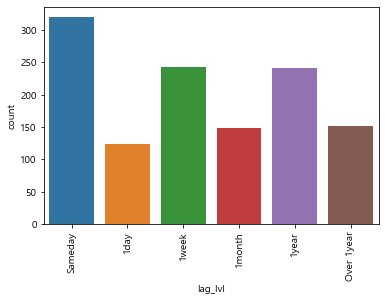

In [265]:
# 가입 당일 구매한 유저가 가장 많음 
plt.figure(figsize = (6,4))
plt.xticks(rotation = 90)
ax = sns.barplot(x = df_lag_lvl['lag_lvl'], y = df_lag_lvl['count'])

In [266]:
df_month = df.groupby('user')['order_month','lag', 'lag_month'].agg({
    'order_month' : 'max', 'lag' : 'min', 'lag_month' : 'min'}).reset_index()
df_month

,user,order_month,lag,lag_month
0,a1100548,3,319,10.6
1,a1100887,3,314,10.5
2,a1101514,2,256,8.5
3,a1101645,2,273,9.1
4,a1102068,3,279,9.3
...,...,...,...,...
1224,a198621,1,271,9.0
1225,a19897,2,857,28.6
1226,a199351,1,248,8.3
1227,a199421,2,294,9.8


In [267]:
# 가입일로부터 첫결제일까지 걸린 시간 lag_lvl에 6개 분류로 표기
cut_labels = ['Sameday', '1day', '1week', '1month', '1year', 'Over 1year']
cut_bins = [-1, 0, 1, 7, 30, 365, 1304]
df_month['lag_lvl'] = pd.cut(df_month['lag'], bins=cut_bins, labels=cut_labels)
df_month

,user,order_month,lag,lag_month,lag_lvl
0,a1100548,3,319,10.6,1year
1,a1100887,3,314,10.5,1year
2,a1101514,2,256,8.5,1year
3,a1101645,2,273,9.1,1year
4,a1102068,3,279,9.3,1year
...,...,...,...,...,...
1224,a198621,1,271,9.0,1year
1225,a19897,2,857,28.6,Over 1year
1226,a199351,1,248,8.3,1year
1227,a199421,2,294,9.8,1year


In [268]:
df_month_lvl = df_month.groupby(['order_month','lag_lvl'])['user'].count().reset_index().rename(columns = {'user' : 'count'})
df_month_lvl.head()

,order_month,lag_lvl,count
0,1,Sameday,55
1,1,1day,20
2,1,1week,48
3,1,1month,61
4,1,1year,79


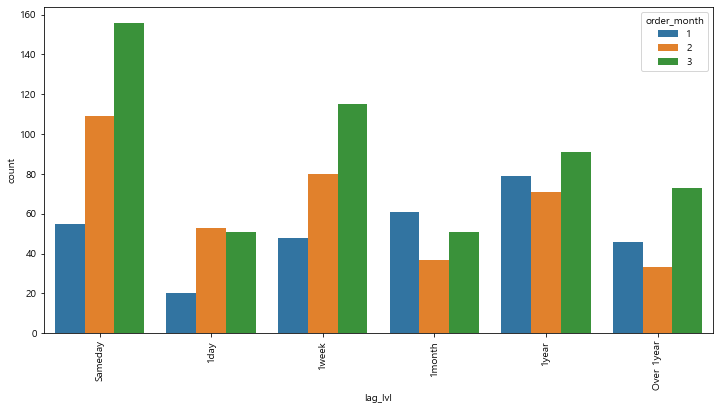

In [269]:
# 3월 가입자 중 당일가입한 경우가 가장 많음
plt.figure(figsize = (12,6))
plt.xticks(rotation = 90)
ax = sns.barplot(x = 'lag_lvl', y = 'count', hue = 'order_month', data = df_month_lvl)

### 월별 데이터

In [272]:
df_jan_users = df.loc[df['order_month'] == 1, 'user'].tolist()
df_feb_users = df.loc[df['order_month'] == 2, 'user'].tolist()
df_mar_users = df.loc[df['order_month'] == 3, 'user'].tolist()

In [280]:
df_jan = df_month[df_month['user'].isin(df_jan_users)].groupby('lag_lvl')['user'].count().reset_index().rename(columns = {'user' : 'count'})
df_feb = df_month[df_month['user'].isin(df_feb_users)].groupby('lag_lvl')['user'].count().reset_index().rename(columns = {'user' : 'count'})
df_mar = df_month[df_month['user'].isin(df_mar_users)].groupby('lag_lvl')['user'].count().reset_index().rename(columns = {'user' : 'count'})

In [293]:
df_jan['pct'] = df_jan['count'] / np.sum(df_jan['count']) * 100
df_feb['pct'] = df_feb['count'] / np.sum(df_feb['count']) * 100
df_mar['pct'] = df_mar['count'] / np.sum(df_mar['count']) * 100

In [308]:
df_jan

,lag_lvl,count,pct
0,Sameday,55,17.8
1,1day,20,6.5
2,1week,48,15.5
3,1month,61,19.7
4,1year,79,25.6
5,Over 1year,46,14.9


<AxesSubplot:xlabel='lag_lvl', ylabel='count'>

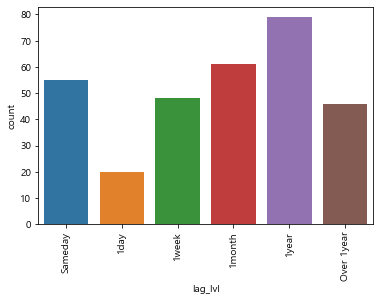

In [316]:
# 1월 주문자
plt.figure(figsize = (6,4))
plt.xticks(rotation = 90)
sns.barplot(x = 'lag_lvl', y = 'count', data = df_jan)

In [317]:
df_feb

,lag_lvl,count,pct
0,Sameday,109,28.5
1,1day,53,13.8
2,1week,80,20.9
3,1month,37,9.7
4,1year,71,18.5
5,Over 1year,33,8.6


<AxesSubplot:xlabel='lag_lvl', ylabel='pct'>

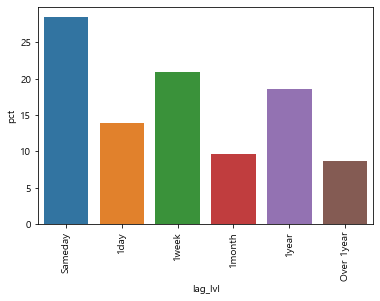

In [303]:
# 2월 주문자
plt.figure(figsize = (6,4))
plt.xticks(rotation = 90)
sns.barplot(x = 'lag_lvl', y = 'pct', data = df_feb)

In [318]:
df_mar

,lag_lvl,count,pct
0,Sameday,156,29.1
1,1day,51,9.5
2,1week,115,21.4
3,1month,51,9.5
4,1year,91,16.9
5,Over 1year,73,13.6


<AxesSubplot:xlabel='lag_lvl', ylabel='pct'>

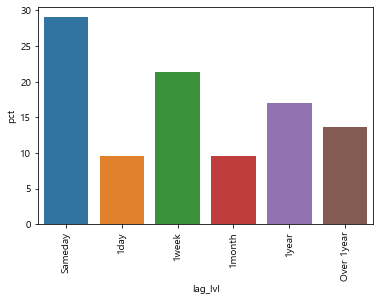

In [304]:
# 3월 주문자
plt.figure(figsize = (6,4))
plt.xticks(rotation = 90)
sns.barplot(x = 'lag_lvl', y = 'pct', data = df_mar)

🛍️ 1월에 비해 2,3월의 가입당일 주문자 비율이 높음 (17.8% -> 28.5% -> 29.1%)